In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
data = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
price = data.price
price

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

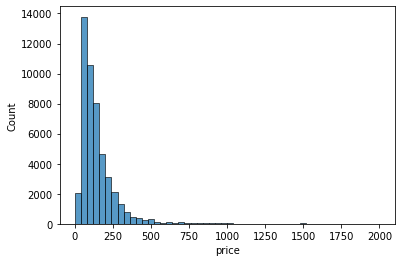

In [10]:
sns.histplot(data.price[data.price<2000], bins=50)

In [11]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
df = data.loc[:, ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                    'calculated_host_listings_count', 'availability_365']]

In [13]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


In [15]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
np.median(df['minimum_nights'])

3.0

In [17]:
df.shape

(48895, 8)

In [45]:
# idx = np.arange(df.shape[0])
idx = df.index
np.random.seed(42)
np.random.shuffle(idx)
idx

[879,
 44383,
 15394,
 43230,
 16332,
 5966,
 29838,
 41764,
 11118,
 31800,
 44211,
 31732,
 5990,
 13153,
 24650,
 19825,
 45050,
 24017,
 32814,
 3290,
 41958,
 5522,
 2757,
 708,
 11972,
 38717,
 47735,
 13963,
 7029,
 37282,
 6720,
 8479,
 4273,
 17483,
 25290,
 15838,
 23716,
 47262,
 37714,
 42436,
 41724,
 16248,
 36070,
 28613,
 21100,
 26812,
 24775,
 41870,
 16492,
 29144,
 19378,
 39079,
 9192,
 25853,
 32361,
 10814,
 45047,
 27026,
 26938,
 31396,
 4883,
 21856,
 42275,
 3939,
 16671,
 15952,
 2210,
 6735,
 14115,
 24897,
 7976,
 14064,
 6196,
 36918,
 12566,
 19013,
 13958,
 147,
 24158,
 24380,
 21848,
 30012,
 19761,
 33544,
 20021,
 43816,
 11478,
 35465,
 21327,
 14564,
 20705,
 20273,
 36934,
 8305,
 30883,
 12539,
 11015,
 7365,
 1644,
 47211,
 33432,
 4982,
 43373,
 7822,
 37532,
 44829,
 31798,
 47722,
 48364,
 25930,
 7040,
 21564,
 23730,
 7800,
 5260,
 6650,
 11605,
 16852,
 20137,
 43494,
 40151,
 2874,
 39631,
 46021,
 11807,
 26405,
 7762,
 15481,
 34759,
 

In [19]:
df = df.iloc[idx]

In [20]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [21]:
df = df.reset_index(drop = True)
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,89,3,62,0.71,1,189
1,40.70666,-73.90779,30,21,0,NaN,1,73
2,40.76116,-73.99016,120,2,17,0.43,1,0
3,40.70763,-74.01050,470,2,5,1.88,327,272
4,40.79658,-73.93287,199,2,30,0.80,1,30


In [22]:
price = df.price

In [23]:
df.drop('price', axis=1, inplace = True)
df.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,NaN,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30


In [25]:
n = df.shape[0]
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [26]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [27]:
log_price = np.log1p(price)
log_price

0        4.499810
1        3.433987
2        4.795791
3        6.154858
4        5.298317
           ...   
48890    4.110874
48891    4.454347
48892    4.875197
48893    5.017280
48894    4.795791
Name: price, Length: 48895, dtype: float64

In [31]:
price_train = log_price[n_train:]
price_val = log_price[n_train:n_train+n_val]
price_test = log_price[n_train+n_val:]

In [32]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [33]:
X_train = df_train.fillna(0).values
y_train = price_train.values
train_linear_regression(X_train, y_train)
type(X_train)

numpy.ndarray

In [34]:
w0, w = train_linear_regression(X_train, y_train)

In [35]:
df_val_filled0 = df_val.fillna(0).values
y_pred_val = w0 + df_val_filled0.dot(w)

In [37]:
rmse(y_pred_val, price_val)

0.6429414189832898

In [40]:
X_train_filled_mean = df_train.fillna(df_train.mean()).values
y_train = price_train.values
train_linear_regression(X_train_filled_mean, y_train)
w0, w = train_linear_regression(X_train_filled_mean, y_train)
df_val_filled_mean = df_val.fillna(df_train.mean()).values
y_pred_val_filled_mean = w0 + df_val_filled_mean.dot(w)

In [42]:
rmse(y_pred_val_filled_mean, price_val)

0.6426956602327644

In [43]:
np.__version__

'1.19.5'